In [25]:
# Load required packages
library(alakazam)
library(ggplot2)

db <- readChangeoDb("all_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

In [26]:
# Partitions the data based on the sample column
clones <- countClones(db)
head(clones, 5)

clone_id,seq_count,seq_freq
<chr>,<int>,<dbl>
3461_1115,8,0.0011494253
1390_61,7,0.0010057471
2679_702,5,0.0007183908
168_4431,3,0.0004310345
2679_1482,3,0.0004310345


In [27]:
# Partitions the data based on both the sample_id and c_call columns
# Weights the clone sizes by the duplicate_count column
clones <- countClones(db, group=c("c_call"), clone="clone_id")
head(clones, 5)

c_call,clone_id,seq_count,seq_freq
<chr>,<chr>,<int>,<dbl>
IGHM,3461_1115,8,0.0015847861
IGHM,1390_61,6,0.0011885895
IGHA,2679_702,5,0.1111111111
IGHA,2679_1482,3,0.0666666667
IGHM,168_4431,3,0.0005942948


In [28]:
# Partitions the data on the sample column
# Calculates a 70% confidence interval via 200 bootstrap realizations
curve <- estimateAbundance(db, ci=0.70, nboot=200, clone="clone_id")

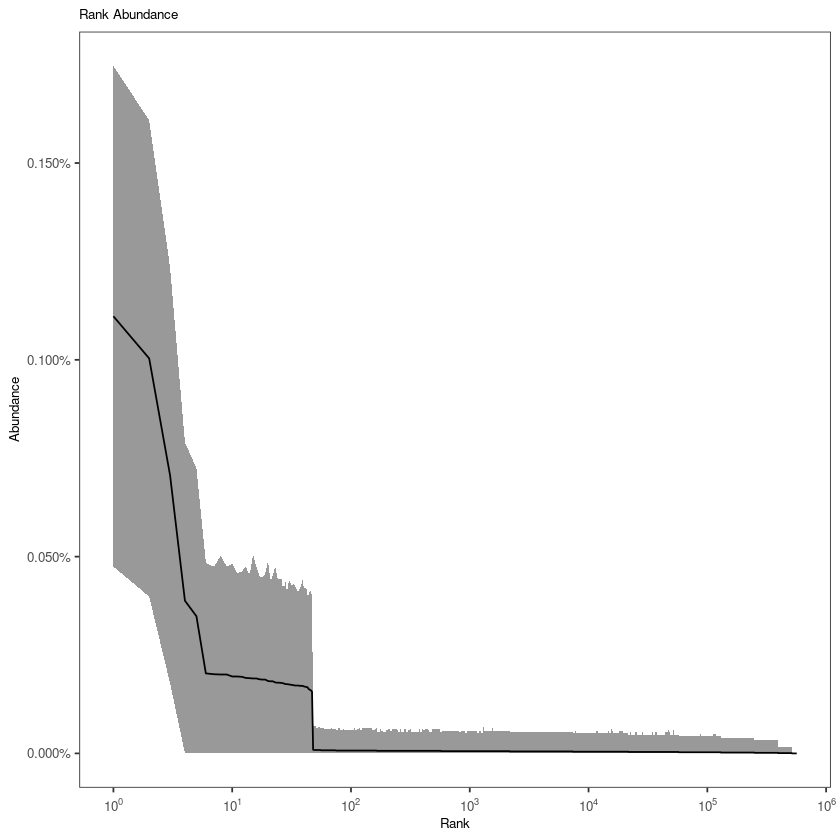

In [29]:
# Plots a rank abundance curve of the relative clonal abundances
sample_colors <- c("-1h"="seagreen", "+7d"="steelblue")
plot(curve, colors = sample_colors, legend_title="Sample")

In [30]:
# Compare diversity curve across values in the "sample" column
# q ranges from 0 (min_q=0) to 4 (max_q=4) in 0.05 increments (step_q=0.05)
# A 95% confidence interval will be calculated (ci=0.95)
# 200 resampling realizations are performed (nboot=200)
sample_curve <- alphaDiversity(db, clone="clone_id",
                               min_q=0, max_q=4, step_q=0.1,
                               ci=0.90, nboot=200)

# Compare diversity curve across values in the c_call column
# Analyse is restricted to c_call values with at least 30 sequences by min_n=30
# Excluded groups are indicated by a warning message
isotype_curve <- alphaDiversity(db, group="c_call", clone="clone_id",
                                min_q=0, max_q=4, step_q=0.1,
                                ci=0.90, nboot=200)

Warning message in estimateAbundance(data, ci = 0.95, ...):
“Not all groups passed threshold min_n=30. Excluded: IGHG1, IGHG2B, IGHG2C, IGHG3”


ERROR: Error in if (f2 > 0) {: missing value where TRUE/FALSE needed


In [ ]:
# Plot a log-log (log_q=TRUE, log_d=TRUE) plot of sample diversity
# Indicate number of sequences resampled from each group in the title
sample_main <- paste0("Sample diversity")
sample_colors <- c("-1h"="seagreen", "+7d"="steelblue")
plot(sample_curve, colors=sample_colors, main_title=sample_main, 
     legend_title="Sample")

In [ ]:
# Plot isotype diversity using default set of Ig isotype colors
isotype_main <- paste0("Isotype diversity")
plot(isotype_curve, colors=IG_COLORS, main_title=isotype_main, 
     legend_title="Isotype")

In [ ]:
# Test diversity at q=0, q=1 and q=2 (equivalent to species richness, Shannon entropy, 
# Simpson's index) across values in the sample_id column
# 200 bootstrap realizations are performed (nboot=200)
isotype_test <- alphaDiversity(db, group="c_call", min_q=0, max_q=2, step_q=1, nboot=200, clone="clone_id")

# Print P-value table
print(isotype_test@tests)